<a href="https://colab.research.google.com/github/chetansolanke14/machine_learning/blob/master/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
____________________


Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.

## Training and Visualizing a Decison Tree


We'll use the iris dataset to visualize how a decision tree works.


In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, 2:] # considering only the petal length and petal width as the features
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Visulising our decision tree**

we can visualize the trained decision tree using the export_graphviz() method.

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

In [6]:
%ls

iris_tree.dot  sample_data/


Now we can use the following command to convert our .dot file to the required format

In [0]:
!dot -Tpng iris_tree.dot -o iris_tree.png

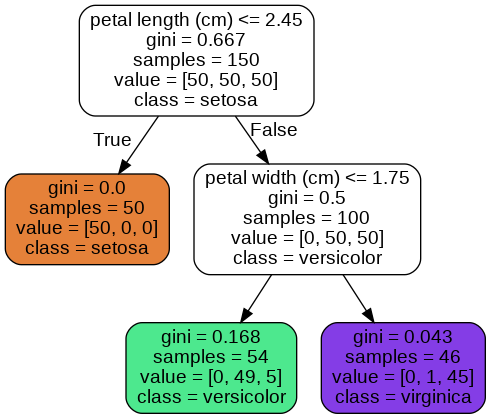

In [8]:
from IPython.display import Image
Image(filename='iris_tree.png')

## Making Predictions

How does the Decision Tree Classifier make predictions ?

To make a prediction the decison classifier follows these steps :

+ Start at the root node (depth 0, at the top), this node asks whether the flower’s petal length is smaller than 2.45 cm:
    + If it is, then you move down to the root’s left child node (depth 1, left). In this case it is a leaf node hence the flower is predicted as setosa.
    + If it is not, then you move down to the root’s right child node (depth 1, right), since it is not a leaf node it asks further questions as, is the petal width smaller than 1.75 cm? 
        + If it is, then your flower is most likely an Iris- Versicolor (depth 2, left).
        + If it is not, If not, it is likely an Iris-Virginica (depth 2, right).
     

A node’s **value** attribute tells you how many training instances of
each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris- Versicolor, and 45 Iris-Virginica. 

### Gini Impurity

A node’s **gini attribute** measures its impurity: a node is **“pure”
(gini=0)** if all training instances it applies to belong to the same class.

For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0. 

The formula for finding the **gini impurity score** of a particular level is :
![Gini index score](http://www.learnbymarketing.com/wp-content/uploads/2016/02/gini-index-formula.png)


Here p<sub>i</sub> is the ratio of class i in the node whose gini index is being calculated. There are total of c classes.

In the above example the depth-2 left node has a gini score equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168.

Scikit-Learn uses the **CART algorithm**, which produces only **binary trees**: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as **ID3** can produce Decision Trees with nodes that have more than two children.





## MODEL INTERPRETATION: WHITE BOX VERSUS BLACK BOX

**White Box models**

Fairly intuitive and their decisions are easy to interpret.

**Black Box models**

They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made.

## Estimating Class Probabilities

A **Decision Tree** can also estimate the probability that an instance belongs to a particular class k. To this - 

+ It first traverses the tree to find the leaf node for this instance
+ Then it returns the ratio of training instances of class k in this node


**Considering an Example**

For example, suppose you have found a **flower whose petals are 5 cm long and 1.5 cm wide**. 

The corresponding leaf node is the **depth-2 left node**, so the Decision Tree should output the following probabilities: **0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris- Virginica (5/54)**.

And of course if you ask it to predict the class, it should output Iris-Versicolor (class 1) since it has the highest probability. Let’s check this:

In [9]:
tree_clf.predict_proba([[5, 1.5]]) # a petal length of 5 and petal width of 1.5

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict_proba([[2.45, 1]]) # a petal length of 5 and petal width of 1.5

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

Notice that the estimated probabilities would be identical anywhere else in the bottom-right rectangle, for example, if the petals were 6 cm long and 1.5 cm wide.

In [12]:
tree_clf.predict_proba([[6, 1.5]]) # a petal length of 6 and a petal width of 1.5

array([[0.        , 0.90740741, 0.09259259]])

In [0]:
prob = tree_clf.predict_proba([[6, 1.5]])

In [14]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
prob[0][1]

0.9074074074074074

In [16]:
iris['data'].shape

(150, 4)

In [19]:
tree_clf.predict([[5, 1.5], [3, 1.5]])

array([1, 1])

## The Cart Training Algorithm


**Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees)**


The idea is really quite simple:
+ First split the training set in two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”).

+ Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub- subsets and so on, recursively.

+ It stops recursing once 
    + It reaches the maximum depth (defined by the max_depth hyperparameter)
    + Or if it cannot find a split that will reduce impurity.


A few other hyperparameters control additional stopping conditions **(min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes)**.


**How does it choose the best pair of k and tk?**
+ It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). 

**The cost function that the algorithm tries to minimize is given by**



![image.png](attachment:image.png)



***About the Cart Algorithm***
+ It is a greedy algorithm as it greedily searches for an optimum split at the top level
+ Then repeats the process at each level. 
+ It does not check whether or not the split will lead to the lowest possible impurity several levels down.
+ A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.


Unfortunately, finding the optimal tree is known to be an NP-Complete problem:2 it requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why we must settle for a “reasonably good” solution.

## Computational Complexity of Decision Trees

**Complexity of Prediction**

+ Making predictions requires traversing the Decision Tree from the root to a leaf.

+ Decision Trees are generally approximately balanced, so traversing the Decision Tree requires going through roughly **O(log<sub>2</sub>(m)) nodes**. 


+ Since each node only requires checking the value of **one feature**, the overall prediction complexity is just **O(log<sub>2</sub>(m))**, independent of the number of features. So predictions are very fast, even when dealing with large training sets.


**Complexity of Training**

+ The training algorithm compares **all features (or less if max_features is set)** on all samples at each node. This results in a training complexity of **O(n × m log(m))**. 

+ For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

## Gini Impurity or Entropy?


By default, the **Gini impurity** measure is used, but you can select the entropy impurity measure instead by setting the **criterion hyperparameter** to **"entropy"**.

Entropy measures the degree of randomness

The formula for measuring entropy is 

![image.png](attachment:image.png)

**So should you use Gini impurity or entropy?**

The truth is, most of the time it does not make a big difference: they lead to similar trees. 

**Gini impurity is slightly faster to compute, so it is a good default**. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.


## Regualrization Hyperparameter


+ Decision Trees make very few assumptions about the training data as opposed to linear models, which obviously assume that the data is linear, for example. 

+ If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and **most likely overfitting it**.

+ Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because **the number of parameters is not determined prior to training**, so the model structure is free to stick closely to the data. 

+ In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).



To avoid overfitting the training data, you need to restrict the **Decision Tree’s freedom** during training. As you know by now, this is called **regularization**. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree.


**Regularization parameters for DecisionTreeClassifier class**
+ ***max_depth*** &rarr; restrict the maximum depth of the Decision Tree
+ ***min_samples_split*** &rarr; the minimum number of samples a node must have before it can be split
+ ***min_samples_leaf*** &rarr; the minimum number of samples a leaf node must have
+ ***min_weight_fraction_leaf*** &rarr; same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
+ ***max_leaf_nodes*** &rarr; maximum number of leaf nodes
+ ***max_features*** &rarr; maximum number of features that are evaluated for splitting at each node 


Increasing **min_* hyperparameters** or **reducing max_* ** hyperparameters will regularize the model.


### &uarr;  min  hyperparameters              **OR**             &darr;  max hyperparameters         &rarr;          More regularization



![image.png](attachment:image.png)



+ On the left, the Decision Tree is trained with the default hyperparameters (i.e., no restrictions)
+ On the right the Decision Tree is trained with min_samples_leaf=4. It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

## Regression

Decision Trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit- Learn’s DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:

**Here X and y are from a noisy quadratic dataset**


In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10

In [21]:
# Manual Computation
res = []
for t in X:
    yl = y[X <= t]
    yln = len(yl)
    myl = np.mean(yl)
    el = yl - myl
    msel = np.sum(el*el)
    yr = y[X> t]
    yrn = len(yr)
    myr = np.mean(yr)
    er = yr - myr
    mser = np.sum(er*er)
    cost = (msel*yln + mser*yrn) / (yln + yrn)
    res.append((t, cost))
res.sort(key=lambda t: t[1])
print(res[0])

(array([0.2517823]), 9.231695778441788)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

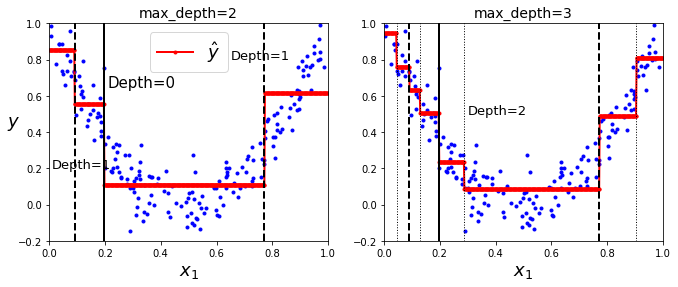

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

![image.png](attachment:image.png)

In [24]:
print(X[0])
print(y[0])

[0.37454012]
[-0.00504175]


In [25]:
tree_reg2.max_depth

3

In [27]:
tree_reg2.predict([[0.40]])

array([0.08445536])

In [26]:
tree_reg2.predict([[0.038]])

array([0.94697815])

In [28]:
tree_reg2.predict([[0.04]])

array([0.94697815])

In [0]:
export_graphviz(
    tree_reg2,
    out_file='tree_reg2.dot',
    rounded=True,
    filled=True)

In [0]:
!dot -Tpng tree_reg2.dot -o tree_reg2.png

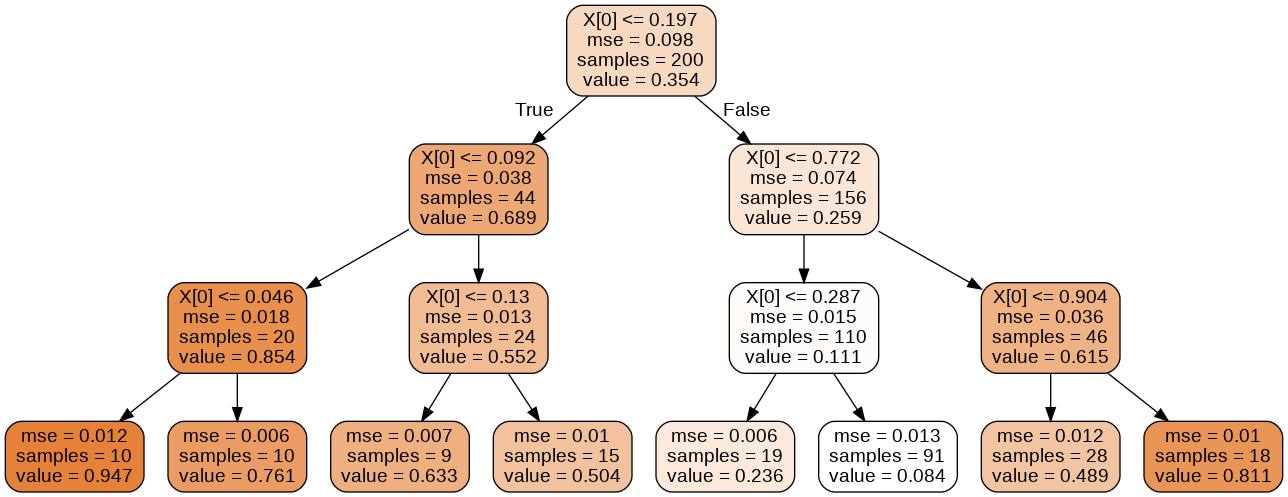

In [31]:
from IPython.display import Image
Image(filename='tree_reg2.png')

The tree for a decision tree regressor looks something like this - 

![image.png](attachment:image.png)

**Suppose you want to make a prediction for a new instance with x1 = 0.6**

+ You traverse the tree starting at the root, and you eventually reach the leaf node that predicts value=0.1106. This prediction is simply the average target value of the
+ 110 training instances associated to this leaf node. This prediction results in a Mean Squared Error (MSE) equal to 0.0151 over these 110 instances.

![image.png](attachment:image.png)

+ Notice how the predicted value for each region is always the average target value of the instances in that region. 
+ The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

**The CART algrithm works the same way except : **
+ Instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

![image.png](attachment:image.png)

Overfitting in Regression


![image.png](attachment:image.png)

+ Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks. 
+ Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left of above figure. 
+ It is obviously overfitting the training set very badly. Just setting min_samples_leaf=10 results in a much more reasonable model, represented on the right of Figure 6-6.

## Demerits of Decision Tree

+ **Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.**

![image.png](attachment:image.png)

Above figure shows a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while on the
right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although
both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not
generalize well.



+ **Decision Trees is that they are very sensitive to small variations in the training data.**

In [0]:
p = 0.7**3 + 3*0.3*0.7**2

In [32]:
tree_reg.max_depth

2

In [34]:
tree_reg.tree_.max_depth

2